# Deep Learning (Neural Network)

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [2]:
#Create the weight matrix for multiple layer of the Deep Learning model
def initialisation(dimensions: list):
    #Dictonary keeping all the hyper parameters
    hyper_parameters = dict()
    
    for c in range(1, len(dimensions)):
        hyper_parameters["W"+ str(c)] = np.random.randn(dimensions[c], dimensions[c-1])
        hyper_parameters["b"+ str(c)] = np.random.randn(dimensions[c], 1)
    return hyper_parameters

In [3]:
#Test initialisation function
hyper_parameters = initialisation([3, 4, 8, 16, 1])
for key, val in hyper_parameters.items():
    print(f"{key}: {val.shape}")

W1: (4, 3)
b1: (4, 1)
W2: (8, 4)
b2: (8, 1)
W3: (16, 8)
b3: (16, 1)
W4: (1, 16)
b4: (1, 1)


In [4]:
#Create the Deep learning model (forward propagation)
def forward_propagation(X, hyper_parameters):
    # Neural network dimension (number of layer)
    dim = len(hyper_parameters)//2

    #Dictonary keeping all the activations functions
    activations = {
        "A0": X,
    }
    
    #Linear and activation function for each layer
    for c in range(1, dim + 1) :
        W = hyper_parameters["W"+str(c)]
        b = hyper_parameters["b"+str(c)]
        A = activations["A"+str(c-1)]

        # Calculate linear and activation functions
        Z = W.dot(A) + b
        A = 1/(1 + np.exp(-Z))

        #Stock activation function
        activations["A" + str(c)] = A
        
    return activations

In [5]:
#Test forward propagations functions 
X = np.random.randn(3, 100)
activations = forward_propagation(X, hyper_parameters)
for key, val in activations.items():
    print(f"{key}: {val.shape}")

A0: (3, 100)
A1: (4, 100)
A2: (8, 100)
A3: (16, 100)
A4: (1, 100)


In [6]:
#Create back propagation function
def back_propagation(y, hyper_parameters, activations):
    # Number osf samples
    m = y.shape[1]
    
    # Neural network dimension (number of layer)
    dim = len(hyper_parameters)//2
    
    #Dictionary of derivatives
    gradients = {
        "dZ" + str(dim): activations["A" + str(dim)] - y
    }
    
    for c in reversed(range(1, dim + 1)):
        n = str(c)
        n_minus = str(c-1)
        
        gradients["dW" + n] = (1/m) * np.dot(gradients["dZ" + n], activations["A" + n_minus].T)
        gradients["db" + n] = (1/m) * np.sum(gradients["dZ" + n], axis= 1, keepdims= True)
        
        #Stop the calculation at dZ1 
        if c > 1:
            gradients["dZ" + n_minus] = np.dot(hyper_parameters["W" + n].T, gradients["dZ" + n]) * activations["A" + n_minus] * (1 - activations["A" + n_minus]) 
        
    return gradients
            

In [7]:
#Test back propagations functions 
y = np.random.randn(1, 100)
gradients = back_propagation(y, hyper_parameters, activations)
for key, val in gradients.items():
    print(f"{key}: {val.shape}")

dZ4: (1, 100)
dW4: (1, 16)
db4: (1, 1)
dZ3: (16, 100)
dW3: (16, 8)
db3: (16, 1)
dZ2: (8, 100)
dW2: (8, 4)
db2: (8, 1)
dZ1: (4, 100)
dW1: (4, 3)
db1: (4, 1)


In [8]:
#Create gradient descend function
def update(gradients, hyper_parameters, learning_rate=0.1):
    # Neural network dimension (number of layer)
    dim = len(hyper_parameters)//2
    
    for c in range(1, dim + 1):
        hyper_parameters["W" + str(c)] = hyper_parameters["W" + str(c)] - learning_rate * gradients["dW" + str(c)]
        hyper_parameters["b" + str(c)] = hyper_parameters["b" + str(c)] - learning_rate * gradients["db" + str(c)]

    return hyper_parameters

In [9]:
#Test gradient descendfunctions 
for key, val in hyper_parameters.items():
    print(f"{key}: {val}")
hyper_parameters = update(gradients, hyper_parameters, learning_rate=0.1)
for key, val in hyper_parameters.items():
    print(f"{key}: {val}")

W1: [[ 0.78330537  0.30522234  0.91291773]
 [-0.85024016  0.47449834  0.3153001 ]
 [ 1.4823551   0.18253158  0.61717309]
 [-0.40902845  0.55809607  0.52284706]]
b1: [[-0.03425662]
 [ 0.66215521]
 [-0.38505363]
 [-0.76135142]]
W2: [[-0.85825914  1.65473434  1.24851509  1.11161173]
 [-0.9910866   0.18969109  0.26262079  1.09248317]
 [-0.19894723 -0.92911477  0.33913925  1.17782227]
 [ 0.09249134  0.8882588  -0.28010698  1.61030776]
 [ 0.88504903  0.4836626  -2.5307999   0.44756045]
 [-1.32667268 -1.79558131 -0.43091676  0.88495638]
 [-0.93396823 -1.60855331  0.50045708 -1.2187601 ]
 [ 0.15104089  0.36408938  0.29372956 -0.84896787]]
b2: [[ 1.28564749]
 [-1.60084586]
 [ 0.82566303]
 [-1.38445325]
 [-0.04371379]
 [ 1.26189052]
 [-0.17847122]
 [ 0.04391843]]
W3: [[-0.75443261  1.48947755  0.0781383  -0.27107244  0.61392213 -1.97661437
  -0.78703178 -0.21663394]
 [ 1.0594025  -0.04418794 -0.70981927  1.6111494   0.12151371 -0.51504891
  -0.55247946 -2.23398004]
 [ 0.64713585  0.27652684  1.3

In [10]:
#Create prediction function to evaluate model 
def predict(X, hyper_parameters):
    n = len(hyper_parameters)//2
    activations = forward_propagation(X, hyper_parameters)
    Af = activations["A" + str(n)]
    return Af >= 0.5

In [11]:
from sklearn.metrics import log_loss, accuracy_score
from tqdm import tqdm

In [12]:
#Create neural network model 
def neural_network(X,y, hidden_layers= (32, 32, 32), learning_rate= 0.1, n_iterations= 1000):
    #Initialisation
    dimensions = list(hidden_layers)
    dimensions.insert(0, X.shape[0])
    dimensions.append(y.shape[0])
    hyper_parameters = initialisation(dimensions)
    
    #Model log loss and accuracy list of values
    model_loss = list()
    model_acc  = list()

    #Retreive number of layer
    n = len(hyper_parameters)//2
    
    #Apply back propagation to the model for n interations
    for i in tqdm(range(n_iterations)):
        #Deep Learning model forward propagation
        activations = forward_propagation(X, hyper_parameters)
        
        #Calculate each layer Jacobien matrix and biais vector
        gradients = back_propagation(y, hyper_parameters, activations)
    
        #Correction of the hyper parameteres to reach theirs optimal values
        hyper_parameters = update(gradients, hyper_parameters, learning_rate)

        
        #Calculate and stock the model loss and accuracy values
        An = activations["A" + str(n)]
        current_loss = log_loss(y.flatten(), An.flatten())
        model_loss.append(current_loss)

        y_pred = predict(X, hyper_parameters)
        current_acc = accuracy_score(y.flatten(), y_pred.flatten())
        model_acc.append(current_acc)

    plt.figure(figsize=(12,8))
    plt.subplot(1,2,1)
    plt.title(f" Log Loss Score: {current_loss}")
    plt.plot(model_loss, label= "Train Loss")
    plt.legend()

    plt.subplot(1,2,2)
    plt.title(f"Accuracy Score: {current_acc}")
    plt.plot(model_acc, label= "Train Acc")
    plt.legend()

    plt.show() 
    

In [13]:
from sklearn.datasets import make_circles

X dim: (2, 100)
y dim: (1, 100)


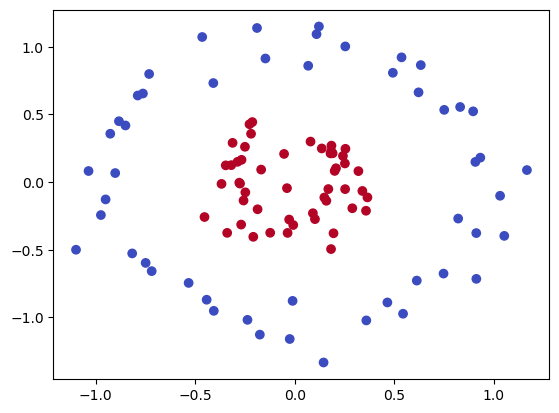

In [14]:
X, y = make_circles(n_samples=100, noise=0.1, factor=0.3, random_state=0)
X = X.T
y = y.reshape((1, y.shape[0]))

print(f"X dim: {X.shape}")
print(f"y dim: {y.shape}")

plt.scatter(X[0, :], X[1, :], c=y, cmap='coolwarm')
plt.show()

100%|██████████████████████████████████████| 3000/3000 [00:15<00:00, 189.69it/s]


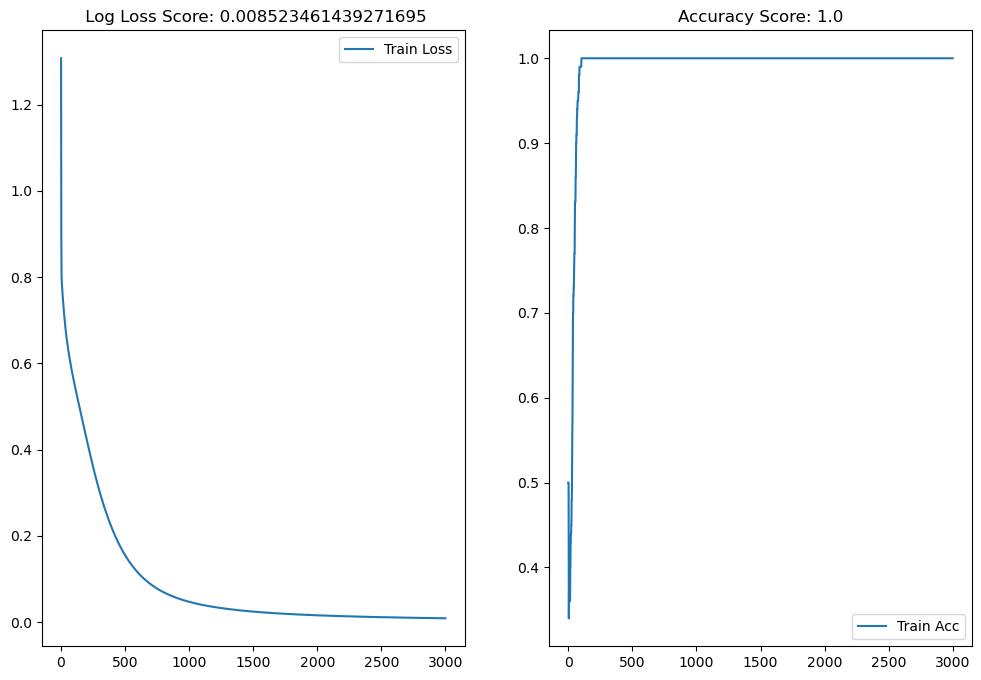

In [15]:
# Test neural network model
neural_network(X, y, n_iterations=3000)